<a href="https://colab.research.google.com/github/prateekmanral011/Earthquake-forecasting/blob/main/Prac1_Well_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lasio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [ ]:
# read the log file; it could be las/csv/txt file
las = lasio.read('/content/Pluto-3ST1_PEX-HRLA_s1r2_main pass.las')

In [ ]:
a=las.curves


In [ ]:
data1=las.df()



In [ ]:
data2=data1.reset_index()
# recheck following reset of index about data column and you can observe 'DEPTH:1' is inside the columns
data2.columns
#statistics of the dataframe, here dataframe name is - data2

data2.describe()

,DEPT,DF,DSO8,EHGR,HCAL,HDRA,HPRA,HTNP,NPHI,PEF8,...,RLA2,RLA3,RLA4,RLA5,RM_HRLT,RSO8,RT_HRLT,RXO8,SP,TENS
count,8650.000000,8650.000000,8640.000000,8650.000000,8650.000000,8640.000000,8640.000000,8650.000000,8650.000000,8640.000000,...,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000
mean,2870.073000,6752.843268,0.113149,90.293294,8.423138,0.014306,-0.355922,0.342509,0.295418,3.968288,...,246.246139,258.752571,282.683965,919.665889,0.032419,0.028081,921.559466,2.013438,-188.236395,4377.260231
std,380.570879,313.645269,0.124872,45.176994,0.742713,0.099695,1.430133,0.086935,0.073594,1.021895,...,4921.398159,5036.989866,5260.521357,9513.350090,0.006952,0.066464,9513.849059,8.368712,24.160933,454.548812
min,2211.019200,4041.912000,0.000000,19.636300,3.950700,-0.626300,-15.489300,0.018700,0.005100,0.900000,...,0.000200,0.000100,0.000300,0.000100,0.002500,0.000000,0.000100,0.030000,-218.875000,3503.000000
25%,2540.546100,6593.014250,0.016675,55.865675,8.220400,-0.005200,-0.030600,0.282900,0.245000,3.244975,...,1.005100,1.030550,1.037275,1.081075,0.028000,0.000000,1.102975,0.760750,-207.437500,4004.000000
50%,2870.073000,6703.313000,0.062800,74.630950,8.538100,-0.001300,0.057900,0.336550,0.292300,3.889650,...,1.312700,1.344500,1.352600,1.413350,0.032300,0.000000,1.467400,1.245850,-197.125000,4441.000000
75%,3199.599900,6877.260000,0.180700,119.371300,8.708300,0.004200,0.116600,0.399900,0.346200,4.556225,...,2.163050,2.226775,2.245225,2.367000,0.038400,0.021200,2.491775,1.808225,-175.640625,4731.000000
max,3529.126800,9132.254000,0.766600,352.151600,12.111900,1.983500,3.704700,0.924000,0.668300,10.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,0.052800,0.800000,100000.000000,365.581300,-118.500000,5301.000000


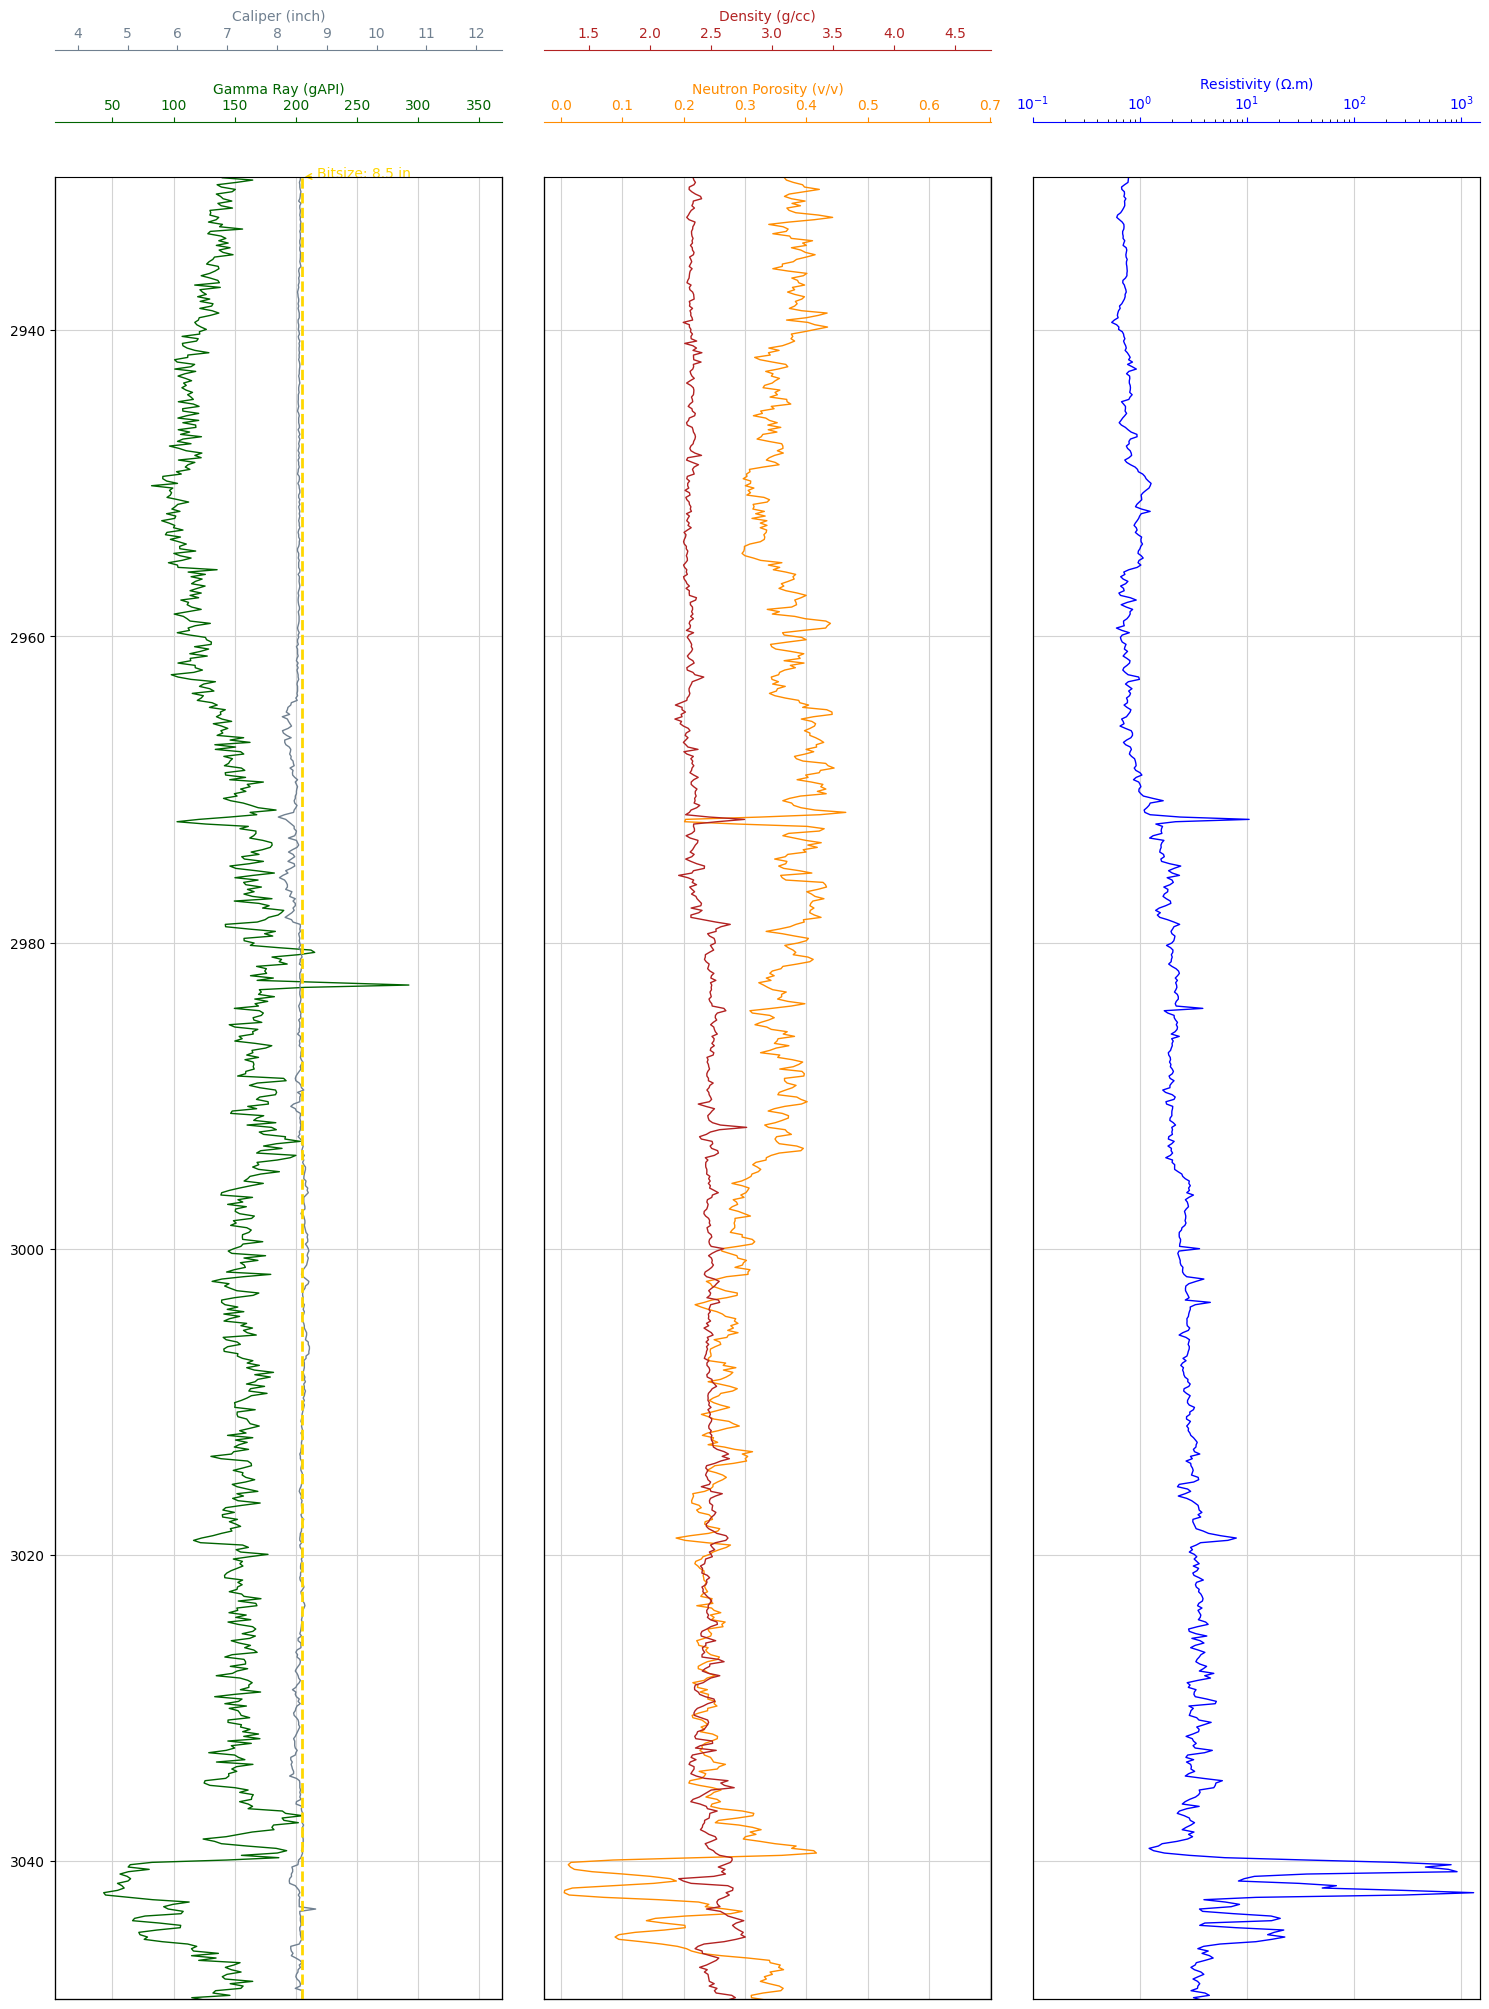

In [ ]:
bitsize=8.5
# Set up the plot axes
fig=plt.figure(figsize=(15,20))
ax=fig.subplots(1,3)
[ax1,ax2,ax3]=[ax[i] for i in range(0,3)]
ax4=ax1.twiny() # Twins the y-axis for the caliper track with the gamma ray track
ax5=ax2.twiny() # Twins the y-axis for the density track with the neutron porosity track

# As our curve scales will be detached from the top of the track, this code adds the top border back in without dealing with spines
ax7=ax1.twiny()
ax7.xaxis.set_visible(False)
ax8=ax2.twiny()
ax8.xaxis.set_visible(False)
ax9=ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot('EHGR', 'DEPT', data=data2, color="#006400", lw=1)
ax1.set_xlabel("Gamma Ray (gAPI)")
ax1.xaxis.label.set_color("#006400")
ax1.tick_params(axis='x', colors="#006400")
ax1.spines.top.set_edgecolor("#006400")


# Neutron Porosity track
ax2.plot('NPHI', 'DEPT', data=data2, color="#FF8C00", lw=1)
ax2.set_xlabel("Neutron Porosity (v/v)")
ax2.xaxis.label.set_color("#FF8C00")
ax2.tick_params(axis='x', colors="#FF8C00")
ax2.spines.top.set_edgecolor("#FF8C00")

# Resistivity log
ax3.plot('RT_HRLT','DEPT',data=data2,color="blue",lw=1)
ax3.set_xlabel("Resistivity ($\\Omega$.m)")
ax3.set_xlim(0.1,1500)
ax3.semilogx()
ax3.xaxis.label.set_color("blue")
ax3.tick_params(axis='x', colors="blue")
ax3.spines.top.set_edgecolor("blue")

# Caliper track over GR
ax4.plot('HCAL', 'DEPT', data=data2, color="#708090", lw=1)
ax4.set_xlabel('Caliper (inch)')
ax4.xaxis.label.set_color("#708090")
ax4.tick_params(axis='x', colors="#708090")
ax4.spines.top.set_edgecolor("#708090")
# Improved bitsize line
ax4.axvline(x=bitsize, color='gold', lw=2, linestyle="--", label=f"Bitsize = {bitsize} in")
ax4.annotate(f"Bitsize: {bitsize} in", xy=(bitsize, 2930),
             xycoords='data', xytext=(bitsize+0.3, 2930),
             arrowprops=dict(arrowstyle="->", color="gold"),
             color="gold", fontsize=10, ha='left')

# Density track over NPHI
ax5.plot('RHO8', 'DEPT', data=data2, color="#B22222", lw=1)
ax5.set_xlabel('Density (g/cc)')
ax5.xaxis.label.set_color("#B22222")
ax5.tick_params(axis='x', colors="#B22222")
ax5.spines.top.set_edgecolor("#B22222")

# Common functions for setting up the plot can be extracted into a for loop. This saves repeating code.
for ax in [ax1,ax2,ax3]:
    ax.set_ylim(3049,2930)
    ax.grid(which='major',color='lightgrey',linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax1.spines.top.set_position(("axes", 1.03))  # Primary GR axis
ax4.spines.top.set_position(("axes", 1.07))  # Caliper overlay

ax2.spines.top.set_position(("axes", 1.03))  # Primary NPHI
ax5.spines.top.set_position(("axes", 1.07))  # Density overlay

ax3.spines.top.set_position(("axes", 1.03))  # Resistivity


# Hide tick labels from y-axis
for ax in [ax2,ax3]:
    ax.yaxis.set_tick_params(left=False,labelleft=False)

plt.tight_layout()

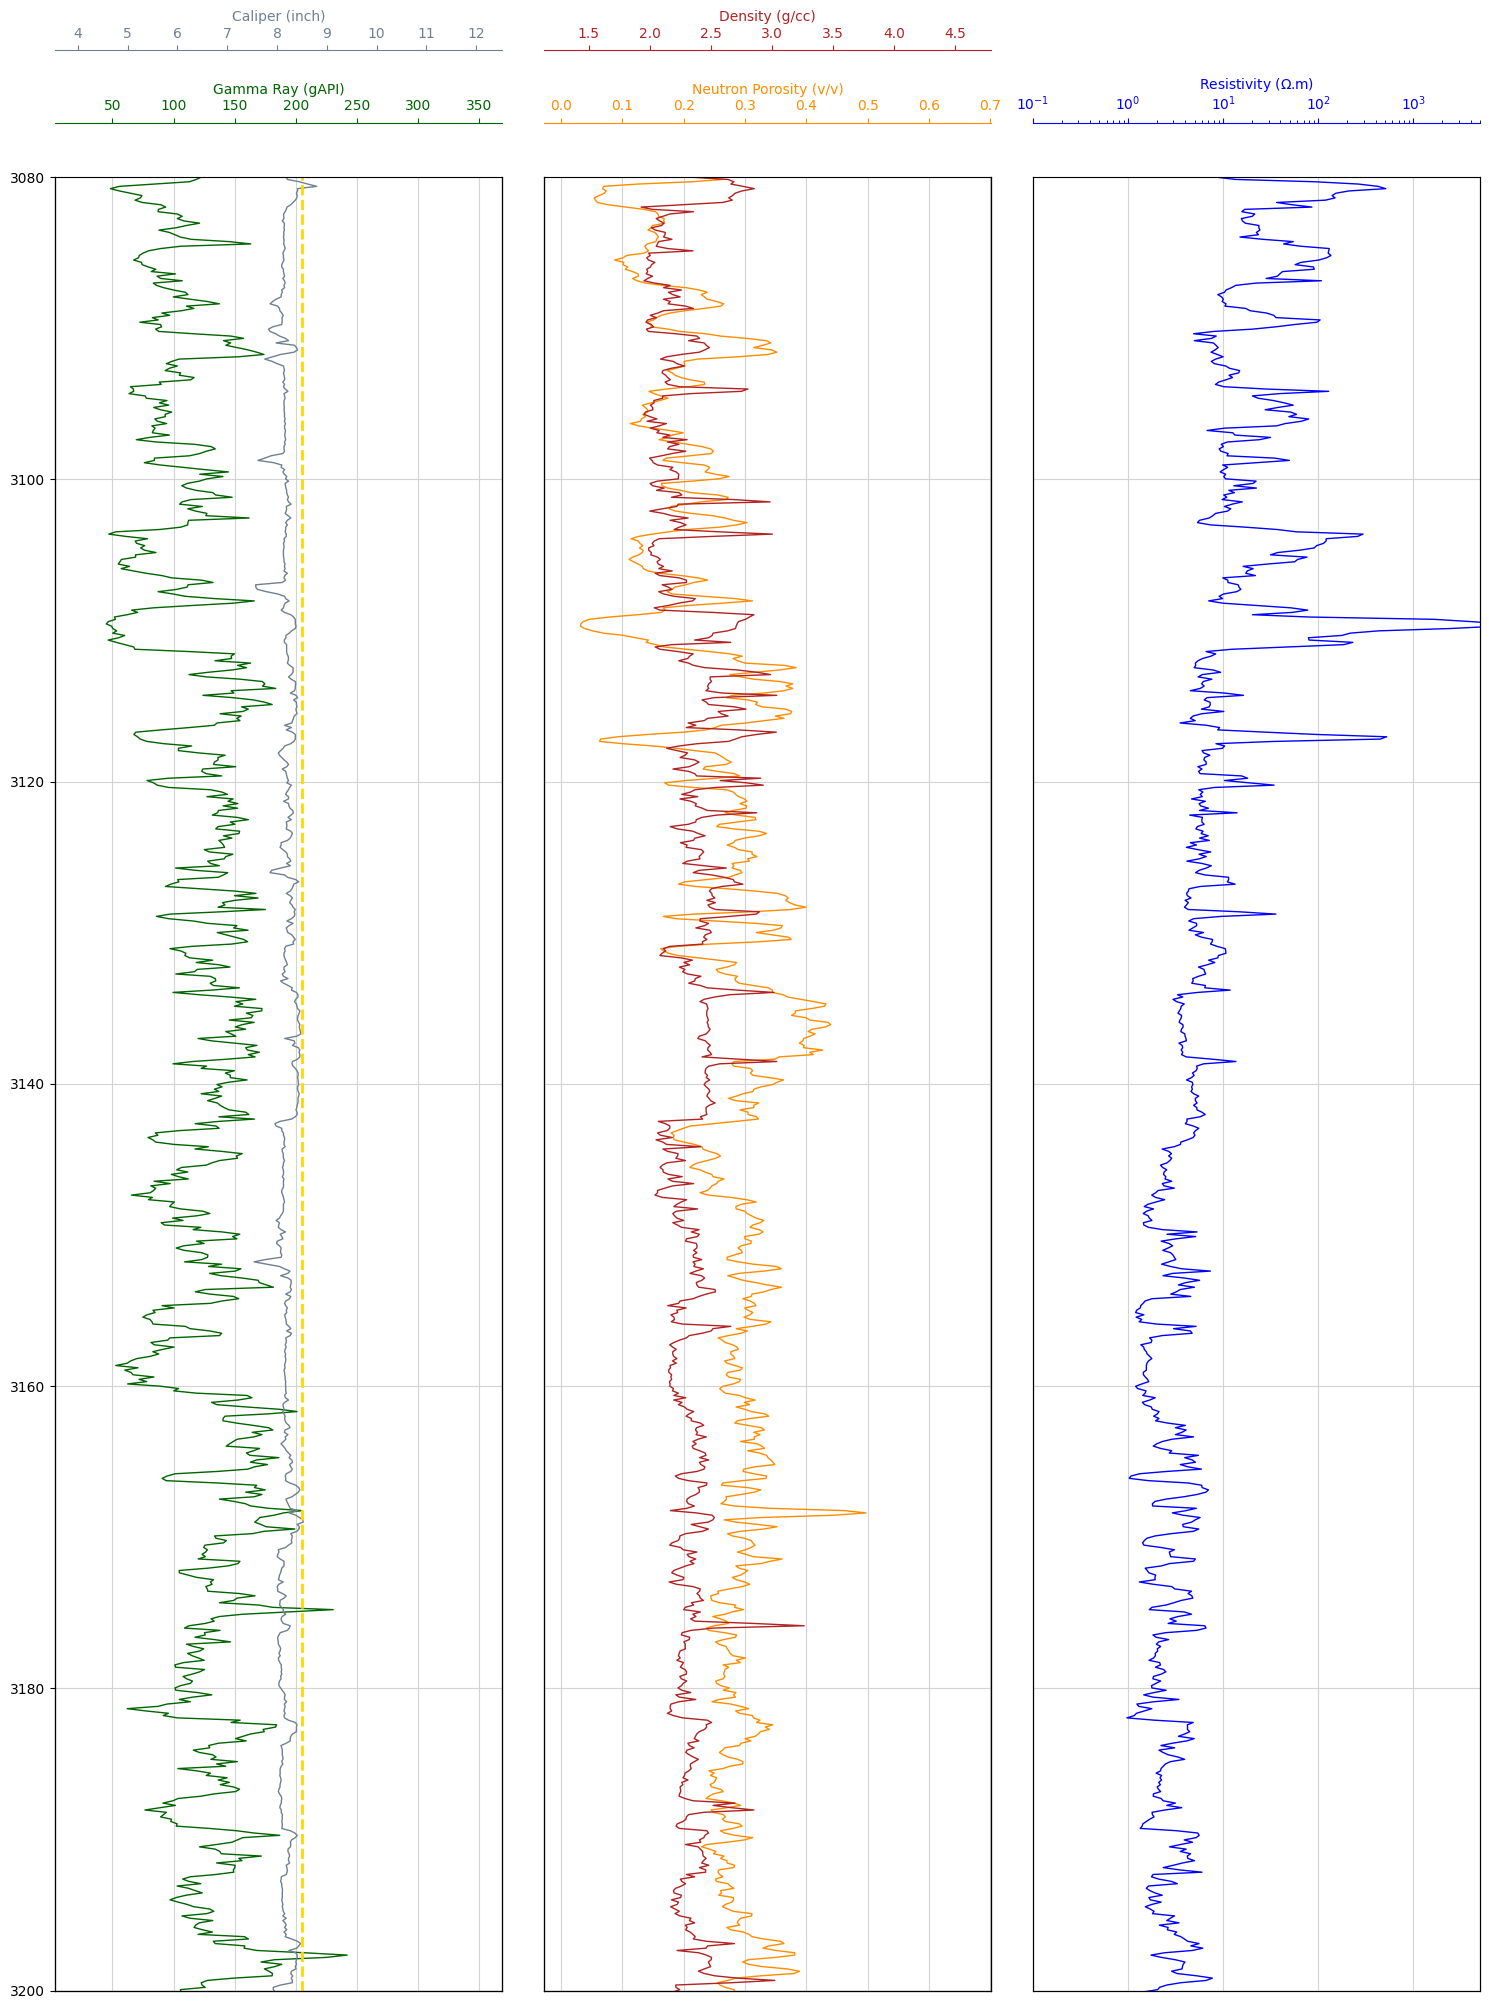

In [ ]:
bitsize=8.5
# Set up the plot axes
fig=plt.figure(figsize=(15,20))
ax=fig.subplots(1,3)
[ax1,ax2,ax3]=[ax[i] for i in range(0,3)]
ax4=ax1.twiny() # Twins the y-axis for the caliper track with the gamma ray track
ax5=ax2.twiny() # Twins the y-axis for the density track with the neutron porosity track

# As our curve scales will be detached from the top of the track, this code adds the top border back in without dealing with spines
ax7=ax1.twiny()
ax7.xaxis.set_visible(False)
ax8=ax2.twiny()
ax8.xaxis.set_visible(False)
ax9=ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot('EHGR', 'DEPT', data=data2, color="#006400", lw=1)
ax1.set_xlabel("Gamma Ray (gAPI)")
ax1.xaxis.label.set_color("#006400")
ax1.tick_params(axis='x', colors="#006400")
ax1.spines.top.set_edgecolor("#006400")


# Neutron Porosity track
ax2.plot('NPHI', 'DEPT', data=data2, color="#FF8C00", lw=1)
ax2.set_xlabel("Neutron Porosity (v/v)")
ax2.xaxis.label.set_color("#FF8C00")
ax2.tick_params(axis='x', colors="#FF8C00")
ax2.spines.top.set_edgecolor("#FF8C00")

# Resistivity log
ax3.plot('RT_HRLT','DEPT',data=data2,color="blue",lw=1)
ax3.set_xlabel("Resistivity ($\\Omega$.m)")
ax3.set_xlim(0.1,5000)
ax3.semilogx()
ax3.xaxis.label.set_color("blue")
ax3.tick_params(axis='x', colors="blue")
ax3.spines.top.set_edgecolor("blue")

# Caliper track over GR
ax4.plot('HCAL', 'DEPT', data=data2, color="#708090", lw=1)
ax4.set_xlabel('Caliper (inch)')
ax4.xaxis.label.set_color("#708090")
ax4.tick_params(axis='x', colors="#708090")
ax4.spines.top.set_edgecolor("#708090")
# Improved bitsize line
ax4.axvline(x=bitsize, color='gold', lw=2, linestyle="--", label=f"Bitsize = {bitsize} in")
ax4.annotate(f"Bitsize: {bitsize} in", xy=(bitsize, 2930),
             xycoords='data', xytext=(bitsize+0.3, 2930),
             arrowprops=dict(arrowstyle="->", color="gold"),
             color="gold", fontsize=10, ha='left')

# Density track over NPHI
ax5.plot('RHO8', 'DEPT', data=data2, color="#B22222", lw=1)
ax5.set_xlabel('Density (g/cc)')
ax5.xaxis.label.set_color("#B22222")
ax5.tick_params(axis='x', colors="#B22222")
ax5.spines.top.set_edgecolor("#B22222")

# Common functions for setting up the plot can be extracted into a for loop. This saves repeating code.
for ax in [ax1,ax2,ax3]:
    ax.set_ylim(3200,3080)
    ax.grid(which='major',color='lightgrey',linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax1.spines.top.set_position(("axes", 1.03))  # Primary GR axis
ax4.spines.top.set_position(("axes", 1.07))  # Caliper overlay

ax2.spines.top.set_position(("axes", 1.03))  # Primary NPHI
ax5.spines.top.set_position(("axes", 1.07))  # Density overlay

ax3.spines.top.set_position(("axes", 1.03))  # Resistivity


# Hide tick labels from y-axis
for ax in [ax2,ax3]:
    ax.yaxis.set_tick_params(left=False,labelleft=False)

plt.tight_layout()